In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
!pip install plotly geopandas
#data = pd.read_csv('/content/Sample - Superstore.csv')
data = pd.read_csv('/content/Sample - Superstore.csv', encoding='latin-1')


data.info(), data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

(None,
    Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
 0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
 1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
 2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
 3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
 4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
 
      Customer Name    Segment        Country             City  ...  \
 0      Claire Gute   Consumer  United States        Henderson  ...   
 1      Claire Gute   Consumer  United States        Henderson  ...   
 2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
 3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
 4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
 
   Postal Code  Region       Product ID         Category Sub-Category  

In [23]:
# Convert 'Order Date' to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Extract month and year from 'Order Date'
data['Year-Month'] = data['Order Date'].dt.to_period('M')



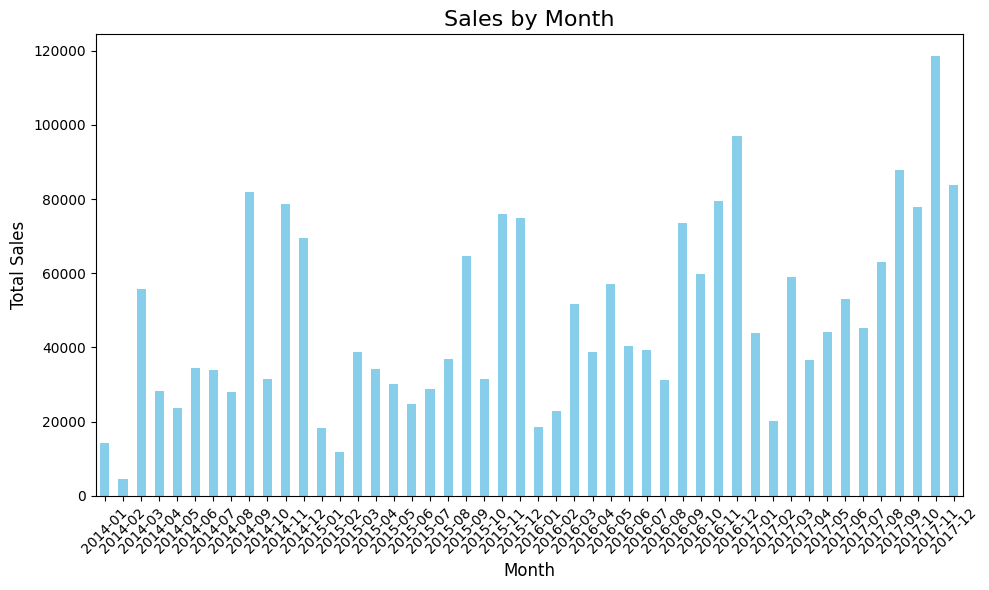

In [24]:


sales_by_month = data.groupby('Year-Month')['Sales'].sum()


plt.figure(figsize=(10, 6))
sales_by_month.plot(kind='bar', color='skyblue')
plt.title('Sales by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

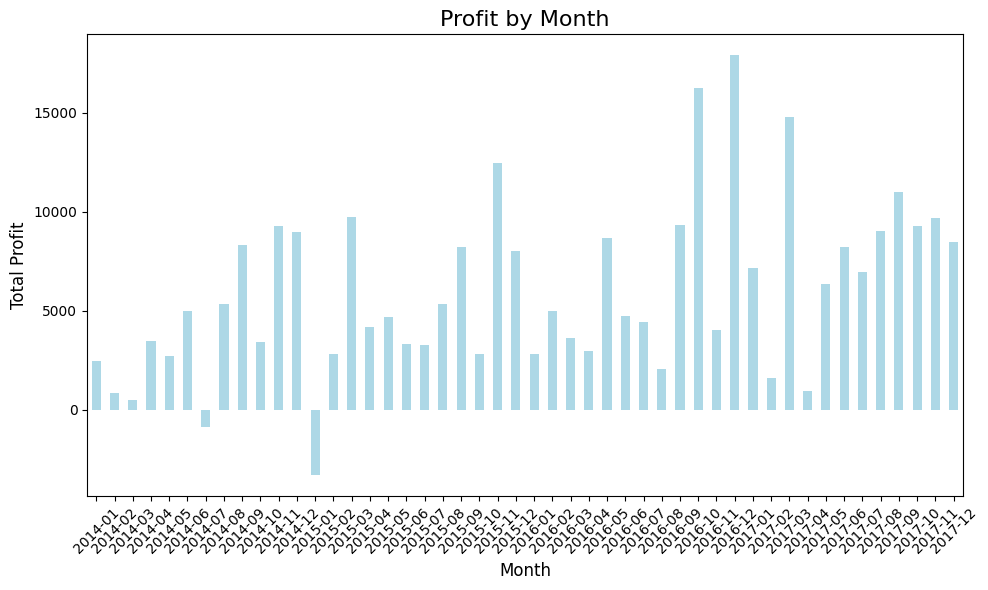

In [25]:

profit_by_month = data.groupby('Year-Month')['Profit'].sum()

plt.figure(figsize=(10, 6))
profit_by_month.plot(kind='bar', color='lightblue')
plt.title('Profit by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-33-f180d6fb5dcc>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning

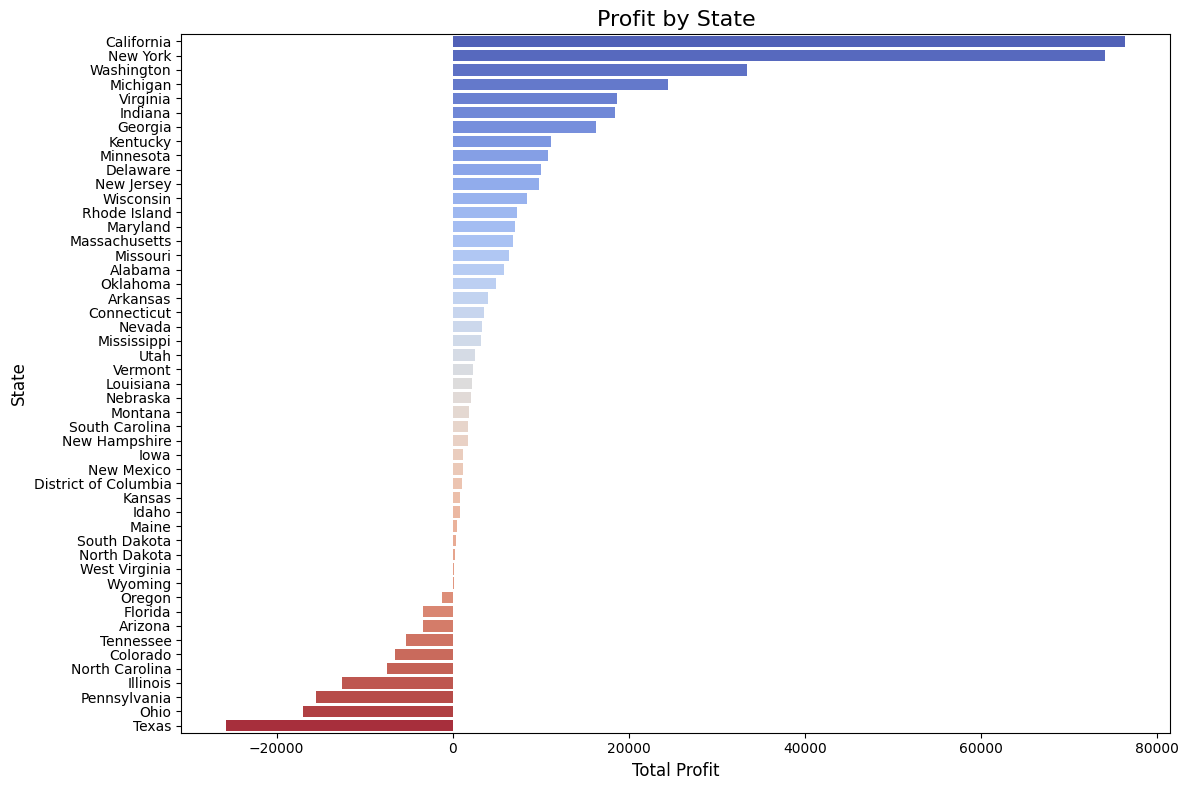

In [33]:

profit_by_state = data.groupby('State')['Profit'].sum().sort_values(ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(x=profit_by_state.values, y=profit_by_state.index, palette='coolwarm')
plt.title('Profit by State', fontsize=16)
plt.xlabel('Total Profit', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.tight_layout()
plt.show()

In [27]:
import plotly.express as px


profit_by_state = data.groupby('State')['Profit'].sum().reset_index()


fig = px.choropleth(profit_by_state,
                    locations='State',
                    locationmode='USA-states',
                    color='Profit',
                    hover_name='State',
                    color_continuous_scale='Oranges',
                    scope='usa')

fig.update_layout(
    title_text='Profit by State in the US',
    geo=dict(
        showcoastlines=True,
        coastlinecolor="RebeccaPurple"
    )
)


fig.show()


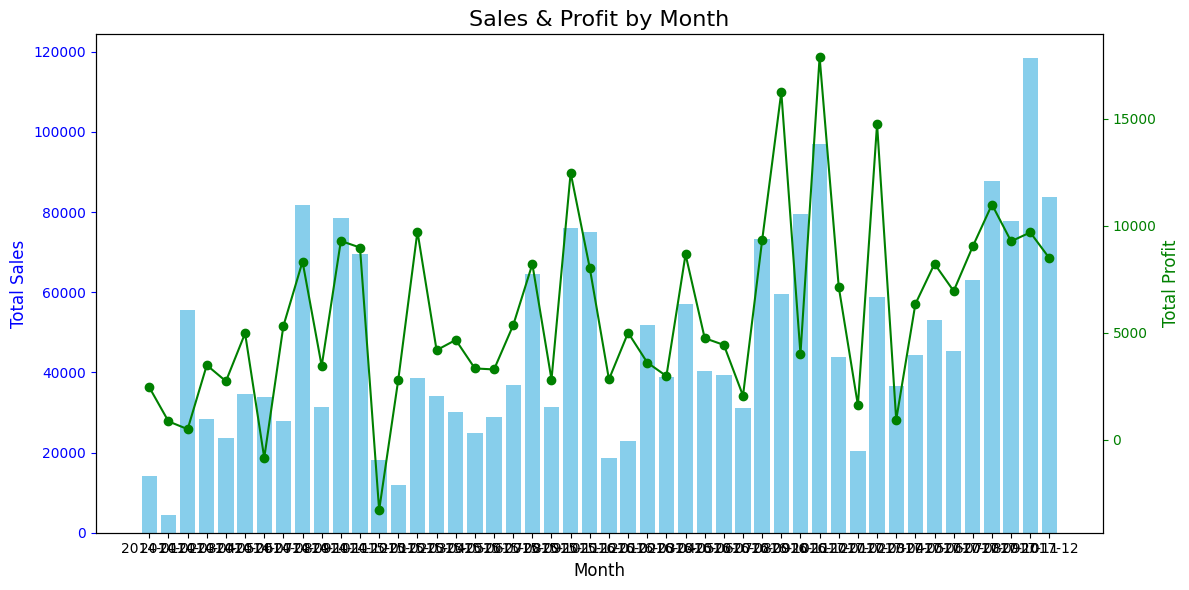

In [32]:

monthly_sales_profit = data.groupby('Year-Month').agg({'Sales': 'sum', 'Profit': 'sum'})


fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(monthly_sales_profit.index.astype(str), monthly_sales_profit['Sales'], color='skyblue', label='Sales')
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Total Sales', fontsize=12, color='blue')
ax1.tick_params('y', colors='blue')

ax2 = ax1.twinx()
ax2.plot(monthly_sales_profit.index.astype(str), monthly_sales_profit['Profit'], color='green', label='Profit', marker='o')
ax2.set_ylabel('Total Profit', fontsize=12, color='green')
ax2.tick_params('y', colors='green')

plt.title('Sales & Profit by Month', fontsize=16)
plt.xticks(rotation=45)
fig.tight_layout()
plt.show()